# Pre-matched data

ModelSkill is a general purpose model skill assessment library for (spatio)/temporal data.

If your data is in a tabular format, where each row corresponds to a time step and you have at least one column with an observed value and another column with modelled values, then you can use the ModelSkill library to assess the model skill.

In [1]:
import pandas as pd
import modelskill as ms

The csv file has 5 columns:

* datetime
* Station X (*observed*)
* linear
* quadratic
* random_forest_n10
    

In [2]:
df = pd.read_csv("../tests/testdata/matched_data.csv", index_col='datetime', parse_dates=True)
df.head()

,Station X,linear,quadratic,random_forest_n10
datetime,,,,
2019-01-01 00:00:00,0.756527,0.775651,0.770355,0.768863
2019-01-01 01:00:00,0.579304,0.584794,0.591272,0.594818
2019-01-01 02:00:00,0.999306,1.043984,1.063773,1.007354
2019-01-01 03:00:00,1.011664,1.003572,1.031288,1.000223
2019-01-01 04:00:00,0.802189,0.811493,0.812934,0.806587


In order to use this dataset for skill assessment we create a `Comparer` with the `modelskill.from_matched()` function, in order to get nice labels on the plots, we also define which physical quantity this represents.

In [3]:
cmp = ms.from_matched(df, obs_item='Station X', quantity=ms.Quantity(name="Some variable",unit="s"))
cmp

<Comparer>
Quantity: Some variable [s]
Observation: Station X, n_points=250
 Model: quadratic, rmse=0.040
 Model: random_forest_n10, rmse=0.025
 Model: linear, rmse=0.054

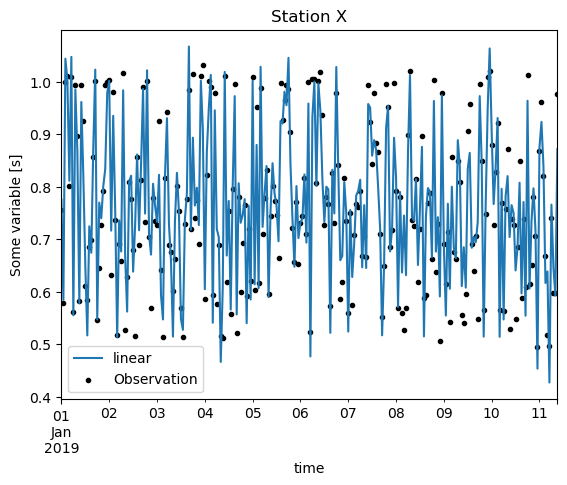

In [4]:
cmp.sel(model='linear').plot.timeseries();

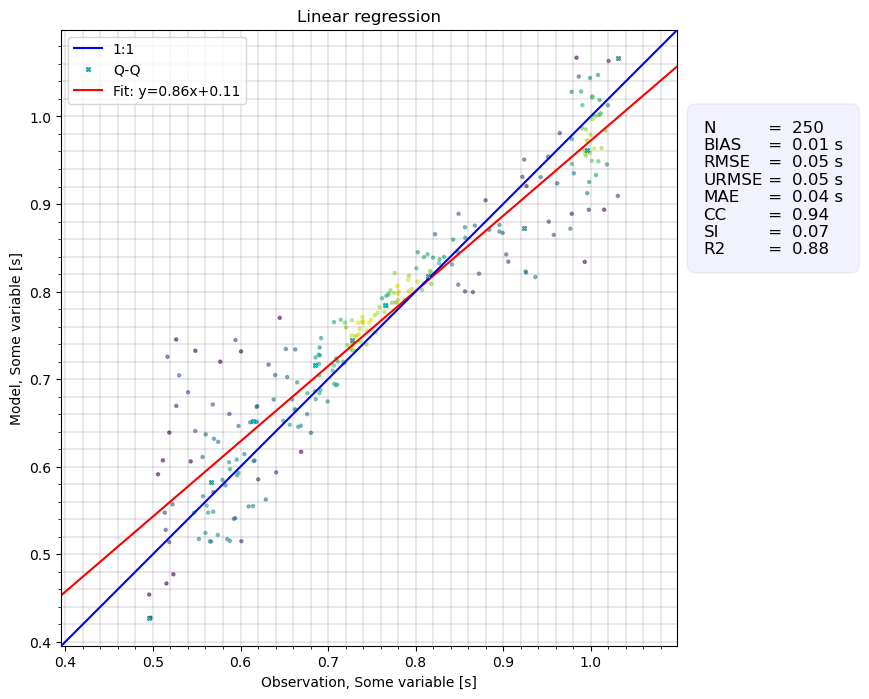

In [5]:
cmp.sel(model='linear').plot.scatter(skill_table=True, title='Linear regression');

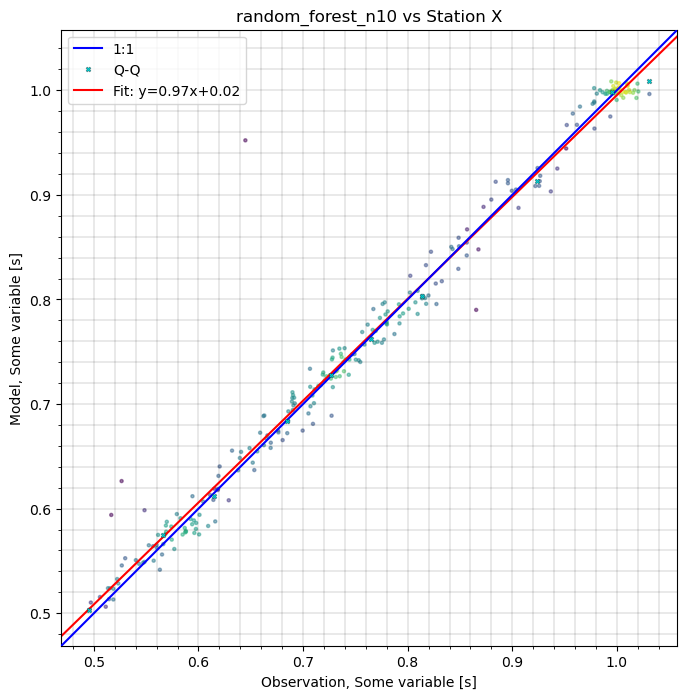

In [6]:
cmp.sel(model='random_forest_n10').plot.scatter();

In [7]:
cmp.skill().round(2)

,observation,n,bias,rmse,urmse,mae,cc,si,r2
model,,,,,,,,,
linear,Station X,250,0.01,0.05,0.05,0.04,0.94,0.07,0.88
quadratic,Station X,250,0.01,0.04,0.04,0.03,0.97,0.05,0.93
random_forest_n10,Station X,250,0.00,0.03,0.03,0.01,0.99,0.03,0.97


In [8]:
cmp.plot.timeseries(backend="plotly")